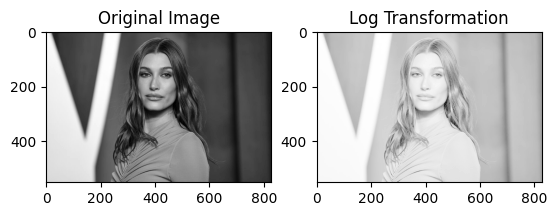

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('image.jpg', 0)

# Apply log transformation
c = 255 / np.log(1 + np.max(image))  # Scaling constant
log_transformed_image = c * np.log(1 + image)

# Convert to uint8 format for displaying
log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)

# Display the original and log-transformed images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Log Transformation')
plt.imshow(log_transformed_image, cmap='gray')
plt.show()


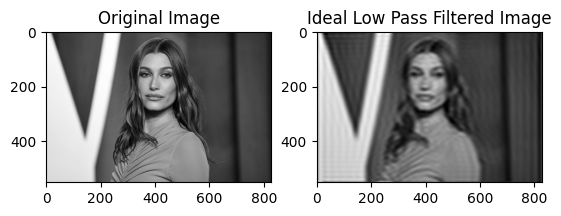

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('image.jpg', 0)

# Get image dimensions
rows, cols = image.shape

# Perform Fourier Transform
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Define cutoff frequency and create mask
cutoff = 30  # You can adjust this value
mask = np.zeros((rows, cols), np.uint8)
center_row, center_col = rows // 2, cols // 2
mask[center_row - cutoff:center_row + cutoff, center_col - cutoff:center_col + cutoff] = 1

# Apply mask and inverse DFT
filtered_dft = dft_shift * mask
idft_shift = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(idft_shift)
filtered_image = np.abs(filtered_image)

# Display the original and filtered images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Ideal Low Pass Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()